<a href="https://colab.research.google.com/github/rochismandatta/Deep_Learning/blob/master/BaseballvCricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True) 
root_dir = "/content/gdrive/My Drive/" 
base_dir = root_dir + '/Colab Notebooks/Data/Img_data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = Path(base_dir)
#dest = path/'Baseball'
#dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/Data/Img_data/Cricket'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/Data/Img_data/Baseball')]

In [ ]:
#bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [ ]:
classes = ['Cricket','Baseball']

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

Cricket


Baseball


In [ ]:
#tfms = get_transforms(do_flip=False)
np.random.seed(42)
bs = 8
data = ImageDataBunch.from_folder(path, train=".",bs = 16, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Baseball', 'Cricket']

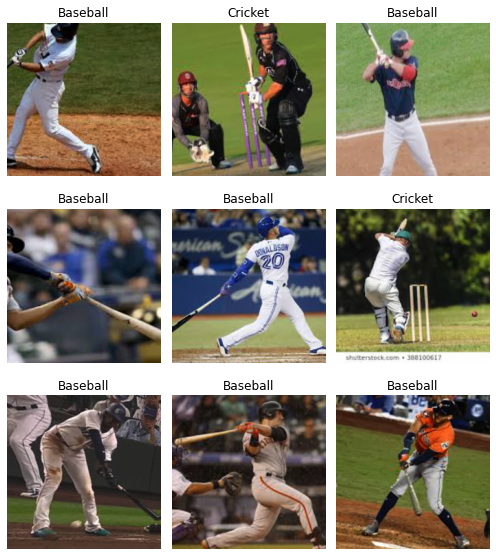

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.843145,1.892461,0.461538,00:02
1,0.870668,2.716098,0.384615,00:01
2,0.658605,2.548196,0.384615,00:01
3,0.542495,0.602392,0.153846,00:01
4,0.437139,0.220848,0.076923,00:01
5,0.366724,0.110843,0.076923,00:01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

(Category tensor(1), tensor(1), tensor([5.5712e-04, 9.9944e-01]))


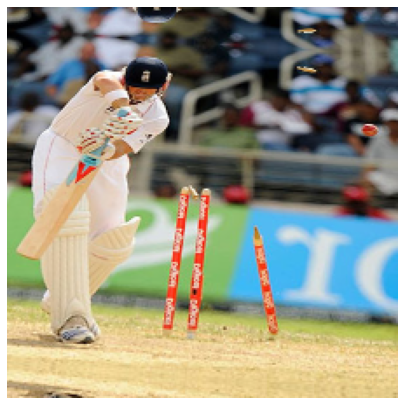

In [ ]:
path2 = root_dir + '/Colab Notebooks/Data/Testing_Model'
test_img = data = ImageDataBunch.from_folder(path2, train=".",bs = 4, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


img = test_img.train_ds[6][0]
img.show(figsize=(7,8))
print(learn.predict(img))
